In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import RobustScaler

In [2]:
def preprocess(directory):
    csv_files=[f for f in os.listdir(directory) if f.endswith('.csv')]
    all_data=[]
    for i in csv_files:
        df=pd.read_csv(os.path.join(directory, i))
        df.columns=['Output1','Output2','Output3','Output4','Output5','Output6','Output7','Output8']
        data=df.iloc[:, :4]
        all_data.append(data)
    my_data=pd.concat(all_data, ignore_index=True)

    return my_data

In [6]:
data=preprocess('datacollected')

In [7]:
data.head(10)

,Output1,Output2,Output3,Output4
0,260872,118226,750051,335524
1,260868,118153,750009,335453
2,260858,118204,750068,335486
3,260828,118304,750078,335544
4,260841,118311,750076,335564
5,260874,118216,750059,335514
6,260892,118153,750069,335468
7,260867,118196,750091,335488
8,260832,118294,750095,335547
9,260840,118292,750080,335563


In [8]:
start_markers = ['start one.png', 'start five.jpg', 'start nine.jpg', 'start six.jpg', 'start zero.png', 'start animal.jpg', 'start four.jpg', 'start eight.jpg', 'start three.jpg', 'start seven.jpg', 'start two.jpg']
end_markers = ['end one.png', 'end five.jpg', 'end nine.jpg', 'end six.jpg', 'end zero.png', 'end animal.jpg', 'end four.jpg', 'end eight.jpg', 'end three.jpg', 'end seven.jpg', 'end two.jpg']

In [9]:
def extract_center_rows(data, start_range, end_range, length):
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")

    if end_range - start_range < length:
        return False, 0

    range_data = data.loc[start_range:end_range]
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")

    center_index = len(range_data) // 2
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    center_rows = range_data.iloc[start_index:end_index]

    return True, center_rows

In [10]:
def extract_data_between_markers(data, start_markers, end_markers, datashape):
    X = []
    Y = []
    between_markers = False
    label = None
    start_idx = None
    end_idx = None
    df_temp = []
    segment_lengths = []

    marker_to_label = {
        'start one.png': 1, 'end one.png': 1,
        'start two.jpg': 2, 'end two.jpg': 2,
        'start three.jpg': 3, 'end three.jpg': 3,
        'start four.jpg': 4, 'end four.jpg': 4,
        'start five.jpg': 5, 'end five.jpg': 5,
        'start six.jpg': 6, 'end six.jpg': 6,
        'start seven.jpg': 7, 'end seven.jpg': 7,
        'start eight.jpg': 8, 'end eight.jpg': 8,
        'start nine.jpg': 9, 'end nine.jpg': 9,
        'start zero.png': 0, 'end zero.png': 0,
        'start animal.jpg': -1, 'end animal.jpg': -1
    }

    for index, row in data.iterrows():
        if row.iloc[0] in start_markers:
            label = marker_to_label[row.iloc[0]]
            start_idx = index
            between_markers = True
            df_temp = []
            print(f"Start marker found at index {index}, label {label},{row.iloc[0]}")
        elif row.iloc[0] in end_markers:
            if between_markers and len(df_temp) > 0:
                end_idx = index
                success, extracted_data = extract_center_rows(data, start_idx, end_idx, datashape[0])
                if success:
                    X.append(extracted_data.values.astype(float))
                    Y.append(label)
                    print(f"End marker found at index {index}, segment length {len(df_temp)}")
                segment_lengths.append(len(df_temp))
            between_markers = False
        elif between_markers:
            df_temp.append(row.iloc[:4].values.tolist())

    X = np.array(X)
    Y = np.array(Y)

    print("Total segments found:", len(segment_lengths))
    print("Segment lengths:", segment_lengths)
    print("Number of segments meeting length requirement:", len(X))

    return X, Y

In [11]:
datashape = (1000, 4)

X, Y = extract_data_between_markers(data, start_markers, end_markers, datashape)


print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("Unique labels in Y:", np.unique(Y))

Start marker found at index 2175, label 0,start zero.png
End marker found at index 3456, segment length 1280
Start marker found at index 4097, label 6,start six.jpg
End marker found at index 5378, segment length 1280
Start marker found at index 6147, label 7,start seven.jpg
End marker found at index 7428, segment length 1280
Start marker found at index 8069, label 4,start four.jpg
End marker found at index 9350, segment length 1280
Start marker found at index 10247, label 5,start five.jpg
End marker found at index 11528, segment length 1280
Start marker found at index 12297, label 8,start eight.jpg
End marker found at index 13578, segment length 1280
Start marker found at index 14347, label 1,start one.png
End marker found at index 15628, segment length 1280
Start marker found at index 16397, label -1,start animal.jpg
End marker found at index 17678, segment length 1280
Start marker found at index 18447, label 9,start nine.jpg
End marker found at index 19600, segment length 1152
Start 

 **For non-numerical image , y=1**

 **For numerical image , y=0**

In [12]:
y_bin=[]
for i in Y:
    if i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
        y_bin.append(0)
    else:
        y_bin.append(1)
print(y_bin)


[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [13]:
scaler = RobustScaler()
scaler.fit(X[0])
for i,x in enumerate(X):
    X[i] = scaler.transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y_bin,test_size=0.2,random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [16]:
model = Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(1000, 4)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 32)           416       
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 248, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 15872)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
5/5 [==============================] - 3s 168ms/step - loss: 1338.3557 - accuracy: 0.6806 - val_loss: 371.7462 - val_accuracy: 0.8235
Epoch 2/50
5/5 [==============================] - 0s 72ms/step - loss: 1083.1382 - accuracy: 0.7639 - val_loss: 690.4192 - val_accuracy: 0.7647
Epoch 3/50
5/5 [==============================] - 0s 78ms/step - loss: 732.8149 - accuracy: 0.7083 - val_loss: 152.5412 - val_accuracy: 0.8235
Epoch 4/50
5/5 [==============================] - 0s 69ms/step - loss: 393.2827 - accuracy: 0.6389 - val_loss: 196.5731 - val_accuracy: 0.8235
Epoch 5/50
5/5 [==============================] - 0s 73ms/step - loss: 233.6706 - accuracy: 0.7292 - val_loss: 78.3257 - val_accuracy: 0.8235
Epoch 6/50
5/5 [==============================] - 0s 71ms/step - loss: 93.7358 - accuracy: 0.7222 - val_loss: 34.3127 - val_accuracy: 0.8235
Epoch 7/50
5/5 [==============================] - 0s 75ms/step - loss: 48.8789 - accuracy: 0.7569 - val_loss: 15.1088 - val_accuracy: 0.8235
E

In [20]:
y_test = np.array(y_test)
x_test = np.array(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_test[i]}")
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 12ms/step
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], T

In [21]:
y_pred=model.predict(x_train)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_train[i]}")

6/6 [==============================] - 0s 13ms/step
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], T

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

6/6 [==============================] - 0s 13ms/step
Sensitivity: 1.00


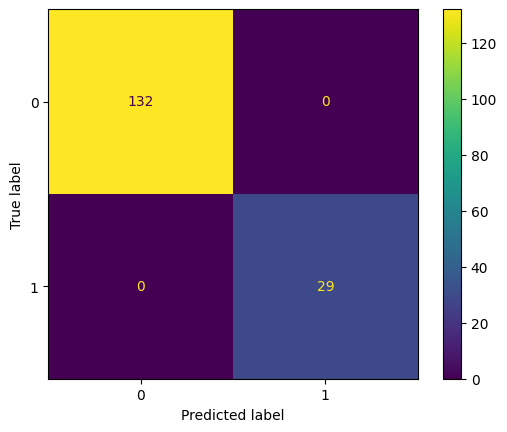

In [23]:
y_pred=model.predict(x_train)
predicted_classes = (y_train >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, predicted_classes,labels=[0,1])

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

2/2 [==============================] - 0s 11ms/step
Sensitivity: 1.00


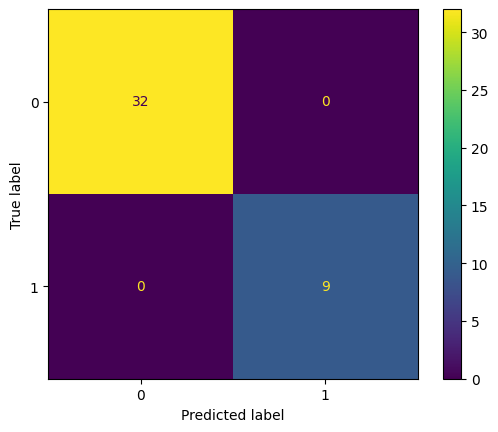

In [24]:
y_pred=model.predict(x_test)
predicted_classes = (y_test >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, predicted_classes,labels=[0,1])

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

In [25]:
from sklearn.metrics import classification_report

# Assuming y_pred is your model's predictions
y_pred = model.predict(x_train)

# Convert probabilities to class labels
y_pred = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1-score
print(classification_report(y_train, y_pred, target_names=['class 0', 'class 1']))

6/6 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

     class 0       0.85      1.00      0.92       132
     class 1       1.00      0.17      0.29        29

    accuracy                           0.85       161
   macro avg       0.92      0.59      0.61       161
weighted avg       0.87      0.85      0.80       161

